In [115]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [116]:
def calcTyD(T,P,HR):
    T+=273.15
    P_vapor=0.0000205*unp.exp(0.0631846*T)
    rho_cubo=1/T*(P/2.8705-HR/100*P_vapor*(1/287.05-1/461.5))
    return rho_cubo

def aplicar_incertidumbre(lista_mediciones,sis_error):
    avg=np.mean(lista_mediciones)
    if len(lista_mediciones)>1:
        desv_est=np.std(lista_mediciones, ddof=1)
        #==================Valor de t-student=================
        IC = 0.95     # PASO 1. Intervalo de confianza
        alpha = 1 - IC      # PASO 2. Valor de alpha
        alpha_medios = alpha/2     # PASO 3. Valor de alpha/2
        n = len(lista_mediciones)     # PASO 4. Número de datos 
        v = n - 1     # PASO 5. Grados de libertad (DOF)
        valor = IC + alpha_medios     # PASO 6. Distr. t-Student (t)
        t = stats.t.ppf(valor, v)
        #======================================================
        rand_error=t*desv_est/np.sqrt(n)
    else:
        rand_error=0
    total_error=np.sqrt(rand_error**2+sis_error**2)
    return ufloat(avg, total_error)

def plot_ufloats(serie1,serie2,colore="firebrick"):
    # Extraer valores medidos y incertidumbres
    if type(serie1[2])==float:
        values1=serie1
        unc1=[0]*len(values1)
    else:
        values1 = [valor.nominal_value for valor in serie1]
        unc1 = [valor.std_dev for valor in serie1]
        
    if type(serie2[2])==float:
        values2=serie2
        unc2=[0]*len(values2)
    else:
        values2 = [valor.nominal_value for valor in serie2]
        unc2 = [valor.std_dev for valor in serie2]

    plt.errorbar(values1,values2, xerr=unc1, yerr=unc2, color=colore,ecolor="#191717",elinewidth=0.75,capsize=1, capthick=0.75,linestyle=' ',marker="o",label="Datos experimentales",markersize=2)

def interpolar(serie1,serie2,grado,conditional,colore="firebrick"):
    values1 = [valor.nominal_value for valor in serie1]
    values2 = [valor.nominal_value for valor in serie2]
    coef = np.polyfit(values1,values2,grado)
    poly1d_fn = np.poly1d(coef)
    #Se calcula R2
    residuals = values2 - poly1d_fn(values1)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((values2-np.mean(values2))**2)
    r2 = 1 - (ss_res / ss_tot)
    x_fit = np.linspace(min(values1), max(values1), 100)
    if grado==2:
        plt.plot(x_fit, poly1d_fn(x_fit),'--', color=colore, linewidth=1, zorder=10)
        plt.annotate(f"y=({round(coef[0],3)})x^2+({round(coef[1],2)})x+({round(coef[2],2)})", (0.8, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=11, color=colore,fontfamily='Times New Roman')
        plt.annotate(f"R²={round(r2,4)}", (0.8, 0.45), xycoords='axes fraction', ha='center', va='center', fontsize=11, color=colore,fontfamily='Times New Roman')
    else:
        plt.plot(x_fit, poly1d_fn(x_fit),'--', color=colore, linewidth=1, zorder=10,label="Datos interpolados")
        if conditional:
            plt.annotate(f"y=({round(coef[0],4)})x+({round(coef[1],2)})", (0.7, 0.45), xycoords='axes fraction', ha='center', va='center', fontsize=11, color=colore,fontfamily='Times New Roman')
            plt.annotate(f"R²={round(r2,4)}", (0.7, 0.4), xycoords='axes fraction', ha='center', va='center', fontsize=11, color=colore,fontfamily='Times New Roman')
    return poly1d_fn

def interpolar_fabricante(serie1,serie2,grado):
    coef = np.polyfit(serie1,serie2,grado)
    poly1d_fn = np.poly1d(coef)
    x_fit = np.linspace(min(serie1), max(serie1), 100)
    plt.plot(x_fit, poly1d_fn(x_fit), color="navy", linewidth=1, zorder=10,label="Curva del fabricante")
    return  poly1d_fn


fontdictval={'fontsize': 11,'fontname': 'Times New Roman',"color":"black"}
#Función para dar formato a la gráfica
def grafica(titulo,ejex,ejey,locacion):
    #=======================Elaboracion ejes==================
    plt.title(titulo, fontdict=fontdictval)
    plt.ylabel(ejey, fontdict=fontdictval)
    plt.xlabel(ejex, fontdict=fontdictval)
    #==========================Enmallado=================================
    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.minorticks_on()
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.5)
    #=====================================================================
    plt.legend(loc=locacion,fontsize=11,frameon=False,prop={'family': 'Times New Roman'})
    plt.show()

In [117]:
df=pd.read_excel('DATOS.xlsx',sheet_name='Datos')
df

df


,Velocidad angular del tunel [RPM],Presión total 1[hPa],Presión total 2[hPa],Presión total 3[hPa],Presión estática 1[hPa],Presión estática 2[hPa],Presión estática 3[hPa],Temperaturas 1[°C],Temperaturas 2[°C],Temperaturas 3[°C],Humedad relativa 1[%],Humedad relativa 2[%],Humedad relativa 3[%],Voltaje 1[V],Voltaje 2[V],Voltaje 3[V],Corriente 1[mA],Corriente 2[mA],Corriente 3[mA]
0,200,743.55,743.55,743.56,743.41,743.41,743.41,20.50,20.70,20.08,48.96,51.30,52.19,12.59,12.62,12.66,320,332,323
1,300,743.93,743.94,743.95,743.50,743.52,743.52,20.24,20.27,20.29,53.08,53.54,53.83,13.02,13.80,13.24,1522,1496,1498
2,400,744.47,744.45,744.50,743.65,743.65,743.66,20.48,20.53,20.57,53.98,54.06,54.12,13.62,13.62,13.62,1457,1427,1431
3,-1,743.00,743.01,742.95,742.88,742.96,742.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0


In [118]:
#Hago un ciclo y agrupo todas las temperaturas en una sola tempreatura, por ejemplo,
#tomo la Temperaturas 1[°C], Temperaturas 2[°C] y Temperaturas 3[°C] y las agrupo en una lista en una nueva columna
for key in df.keys():
    df[key]=df[key].apply(lambda x: [x])

for key in ["Presión total x[hPa]","Presión estática x[hPa]","Temperaturas x[°C]","Humedad relativa x[%]","Voltaje x[V]","Corriente x[mA]"]:
    key_replaced=key.replace("x","")
    df[key_replaced]=pd.Series([[] for i in range(len(df))])
    for i in range(1,4):
        df[key_replaced]+=df[key.replace("x",str(i))]
        df.drop(key.replace("x",str(i)),axis=1,inplace=True)

uncertainities={
                "Velocidad angular del tunel [RPM]":0,
                "Presión total [hPa]":0.01,
                "Presión estática [hPa]":0.01,
                "Temperaturas [°C]":0.01,
                "Humedad relativa [%]":0.01,
                "Voltaje [V]":0.01,
                "Corriente [mA]":0.01}

for column in df.columns:
    df[column] = df[column].apply(aplicar_incertidumbre,args=(uncertainities[column],))

df

,Velocidad angular del tunel [RPM],Presión total [hPa],Presión estática [hPa],Temperaturas [°C],Humedad relativa [%],Voltaje [V],Corriente [mA]
0,200.0+/-0,743.553+/-0.017,743.410+/-0.010,20.4+/-0.8,51+/-4,12.62+/-0.09,325+/-16
1,300.0+/-0,743.940+/-0.027,743.513+/-0.030,20.27+/-0.06,53.5+/-0.9,13.4+/-1.0,(1.51+/-0.04)e+03
2,400.0+/-0,744.47+/-0.06,743.653+/-0.017,20.53+/-0.11,54.05+/-0.17,13.620+/-0.010,(1.44+/-0.04)e+03
3,-1.0+/-0,742.99+/-0.08,742.92+/-0.10,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010


In [119]:
df["Densidad del aire [kg/m^3]"]=df.apply(lambda x: calcTyD(x["Temperaturas [°C]"],x["Presión total [hPa]"],x["Humedad relativa [%]"]),axis=1)
df

,Velocidad angular del tunel [RPM],Presión total [hPa],Presión estática [hPa],Temperaturas [°C],Humedad relativa [%],Voltaje [V],Corriente [mA],Densidad del aire [kg/m^3]
0,200.0+/-0,743.553+/-0.017,743.410+/-0.010,20.4+/-0.8,51+/-4,12.62+/-0.09,325+/-16,0.8770+/-0.0026
1,300.0+/-0,743.940+/-0.027,743.513+/-0.030,20.27+/-0.06,53.5+/-0.9,13.4+/-1.0,(1.51+/-0.04)e+03,0.87773+/-0.00024
2,400.0+/-0,744.47+/-0.06,743.653+/-0.017,20.53+/-0.11,54.05+/-0.17,13.620+/-0.010,(1.44+/-0.04)e+03,0.8774+/-0.0004
3,-1.0+/-0,742.99+/-0.08,742.92+/-0.10,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.94759+/-0.00011


In [120]:
df["Velocidad (m/s)"]=unp.sqrt(2*((df["Presión total [hPa]"]-df["Presión estática [hPa]"])*100)/df["Densidad del aire [kg/m^3]"])
df

,Velocidad angular del tunel [RPM],Presión total [hPa],Presión estática [hPa],Temperaturas [°C],Humedad relativa [%],Voltaje [V],Corriente [mA],Densidad del aire [kg/m^3],Velocidad (m/s)
0,200.0+/-0,743.553+/-0.017,743.410+/-0.010,20.4+/-0.8,51+/-4,12.62+/-0.09,325+/-16,0.8770+/-0.0026,5.7+/-0.4
1,300.0+/-0,743.940+/-0.027,743.513+/-0.030,20.27+/-0.06,53.5+/-0.9,13.4+/-1.0,(1.51+/-0.04)e+03,0.87773+/-0.00024,9.9+/-0.5
2,400.0+/-0,744.47+/-0.06,743.653+/-0.017,20.53+/-0.11,54.05+/-0.17,13.620+/-0.010,(1.44+/-0.04)e+03,0.8774+/-0.0004,13.7+/-0.5
3,-1.0+/-0,742.99+/-0.08,742.92+/-0.10,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.94759+/-0.00011,4+/-4


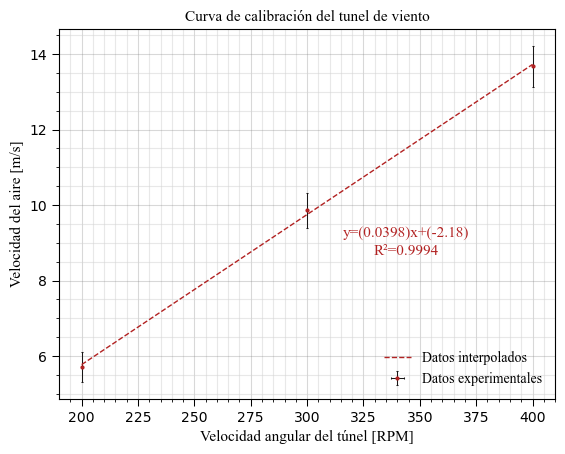

In [121]:
plot_ufloats(df["Velocidad angular del tunel [RPM]"][df.index<3],df["Velocidad (m/s)"][df.index<3])
interpolar(df["Velocidad angular del tunel [RPM]"][df.index<3],df["Velocidad (m/s)"][df.index<3],1,conditional=True)
grafica("Curva de calibración del tunel de viento","Velocidad angular del túnel [RPM]","Velocidad del aire [m/s]","lower right")


In [122]:
df["Potencia Eólica [W]"]=0.5*df["Densidad del aire [kg/m^3]"]*df["Velocidad (m/s)"]**3*np.pi*(0.51/2)**2
df

,Velocidad angular del tunel [RPM],Presión total [hPa],Presión estática [hPa],Temperaturas [°C],Humedad relativa [%],Voltaje [V],Corriente [mA],Densidad del aire [kg/m^3],Velocidad (m/s),Potencia Eólica [W]
0,200.0+/-0,743.553+/-0.017,743.410+/-0.010,20.4+/-0.8,51+/-4,12.62+/-0.09,325+/-16,0.8770+/-0.0026,5.7+/-0.4,16.7+/-3.5
1,300.0+/-0,743.940+/-0.027,743.513+/-0.030,20.27+/-0.06,53.5+/-0.9,13.4+/-1.0,(1.51+/-0.04)e+03,0.87773+/-0.00024,9.9+/-0.5,86+/-12
2,400.0+/-0,744.47+/-0.06,743.653+/-0.017,20.53+/-0.11,54.05+/-0.17,13.620+/-0.010,(1.44+/-0.04)e+03,0.8774+/-0.0004,13.7+/-0.5,229+/-28
3,-1.0+/-0,742.99+/-0.08,742.92+/-0.10,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.000+/-0.010,0.94759+/-0.00011,4+/-4,5+/-14


C:\Users\Juan Ardila\AppData\Local\Temp\ipykernel_15696\1645920954.py:2: RankWarning: Polyfit may be poorly conditioned
  interpolar(df["Velocidad (m/s)"][df.index<3],df["Potencia Eólica [W]"][df.index<3],3,conditional=False)


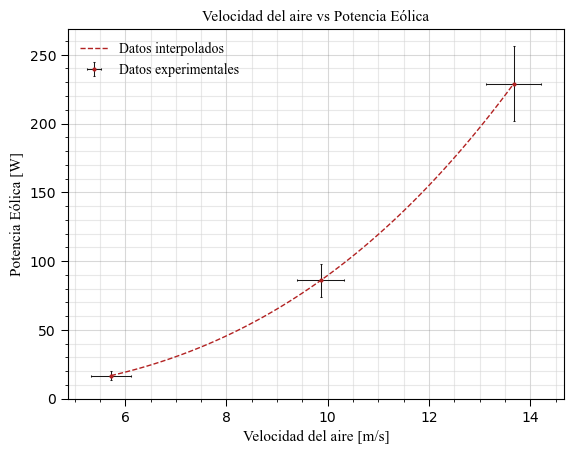

In [123]:
plot_ufloats(df["Velocidad (m/s)"][df.index<3],df["Potencia Eólica [W]"][df.index<3])
interpolar(df["Velocidad (m/s)"][df.index<3],df["Potencia Eólica [W]"][df.index<3],3,conditional=False)
plt.ylim(bottom=0)
grafica("Velocidad del aire vs Potencia Eólica","Velocidad del aire [m/s]","Potencia Eólica [W]","upper left")


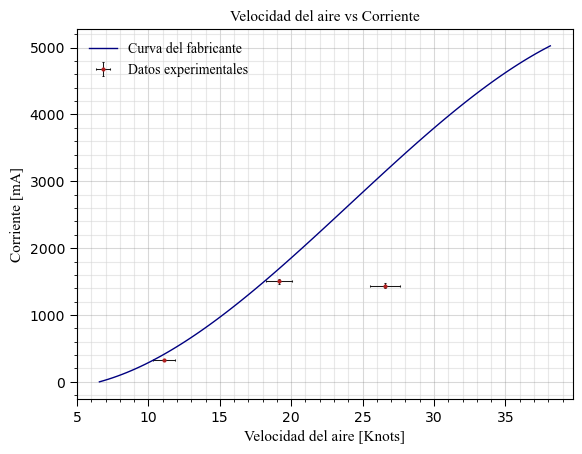

In [124]:
#Voy a cargar un csv solo con numeros y le voy a agregar los headers

df2=pd.read_csv("Curva Fabricante Corriente.csv",header=None)
df2.columns=["Windspeed (knots)","Current (A)"]
df2["Current (mA)"]=df2["Current (A)"]*1000

interpolar_fabricante(df2["Windspeed (knots)"],df2["Current (mA)"],3)
plot_ufloats(df["Velocidad (m/s)"][df.index<3]/0.515,df["Corriente [mA]"][df.index<3])
grafica("Velocidad del aire vs Corriente","Velocidad del aire [Knots]","Corriente [mA]","upper left")

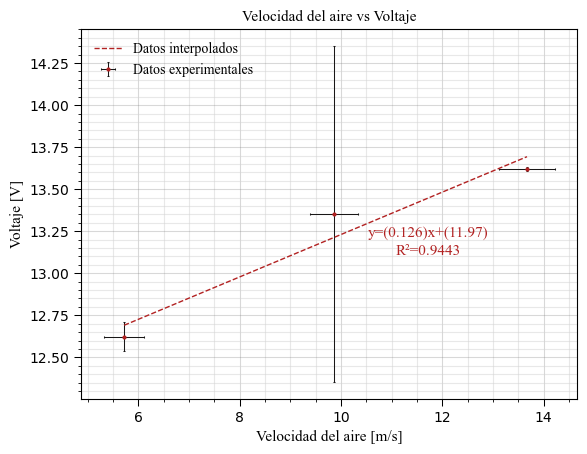

In [125]:
plot_ufloats(df["Velocidad (m/s)"][df.index<3],df["Voltaje [V]"][df.index<3])
interpolar(df["Velocidad (m/s)"][df.index<3],df["Voltaje [V]"][df.index<3],1,conditional=True)
grafica("Velocidad del aire vs Voltaje","Velocidad del aire [m/s]","Voltaje [V]","upper left")

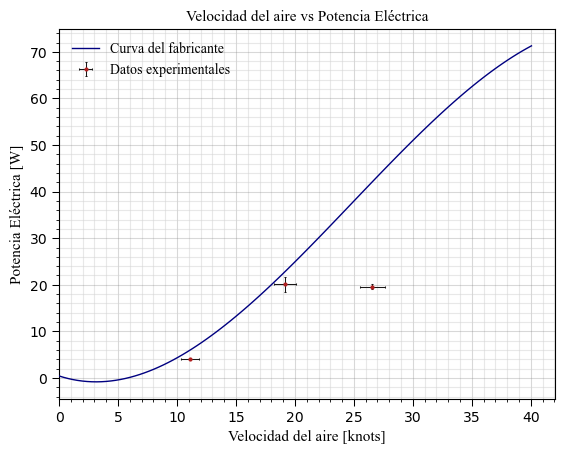

In [126]:
df["Potencia Eléctrica [W]"]=df["Voltaje [V]"]*df["Corriente [mA]"]/1000

df3=pd.read_csv("Curva Fabricante Potencia.csv",header=None)
df3.columns=["Windspeed (knots)","Power (W)"]

interpolar_fabricante(df3["Windspeed (knots)"],df3["Power (W)"],3)
plot_ufloats(df["Velocidad (m/s)"][df.index<3]/0.515,df["Potencia Eléctrica [W]"][df.index<3])
plt.xlim(left=0)
grafica("Velocidad del aire vs Potencia Eléctrica","Velocidad del aire [knots]","Potencia Eléctrica [W]","upper left")

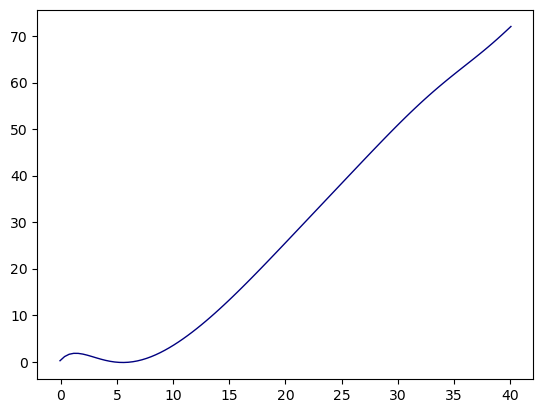

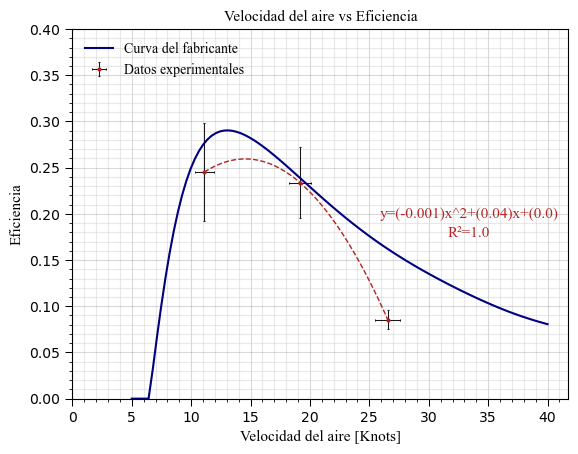

In [127]:
df["Eficiencia"]=df["Potencia Eléctrica [W]"]/df["Potencia Eólica [W]"]

v=np.linspace(5,40,100)
#Creo un df a partir del linspace
df4=pd.DataFrame({"Velocidad [knots]":v})
df4["Potencia Eólica [W]"]=0.5*(df4["Velocidad [knots]"]*0.515)**3*np.pi*(0.51/2)**2

funcion_potencia=interpolar_fabricante(df3["Windspeed (knots)"],df3["Power (W)"],10)
plt.show()

df4["Potencia Eléctrica [W]"]=funcion_potencia(df4["Velocidad [knots]"])
#Pongo en 0 la potencia electrica de los valores negativos
df4["Potencia Eléctrica [W]"][df4["Potencia Eléctrica [W]"]<0]=0

plot_ufloats(df["Velocidad (m/s)"][df.index<3]/0.515,df["Eficiencia"][df.index<3])
plt.plot(df4["Velocidad [knots]"],df4["Potencia Eléctrica [W]"]/df4["Potencia Eólica [W]"],color="navy",label="Curva del fabricante")
interpolar(df["Velocidad (m/s)"][df.index<3]/0.515,df["Eficiencia"][df.index<3],2,conditional=True)
plt.ylim(bottom=0,top=0.4)
plt.xlim(left=0)
grafica("Velocidad del aire vs Eficiencia","Velocidad del aire [Knots]","Eficiencia","upper left")

In [128]:
df4

,Velocidad [knots],Potencia Eólica [W],Potencia Eléctrica [W]
0,5.000000,1.743942,0.000000
1,5.353535,2.140642,0.000000
2,5.707071,2.593353,0.000000
3,6.060606,3.105776,0.000000
4,6.414141,3.681608,0.000000
...,...,...,...
95,38.585859,801.505358,68.815617
96,38.939394,823.738735,69.573618
97,39.292929,846.379518,70.348015
98,39.646465,869.431407,71.136100
